# Regression tree



A regression tree is a type of decision tree used for solving regression problems. 
Regression problems involve predicting a continuous target variable, as opposed to classification problems where the goal is to predict discrete class labels. 
Regression trees are a popular machine learning technique for modeling relationships between input features and continuous outcomes. 

<img src="../dtRegression.png" width="618"/>

## Example: Boston dataset

In [42]:
import pandas as pd
boston = pd.read_csv("../ISLP_datasets/Boston.csv").drop("Unnamed: 0", axis=1)
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


Select features and targets:

In [43]:
y = boston['medv']
X = boston.drop('medv', axis=1)

Split into train and test:

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Train a regression decision tree:

In [45]:
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_graphviz

DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)
print("Train R-score:", DT.score(X_train, y_train))
print("Test R-score:", DT.score(X_test, y_test))

Train R-score: 1.0
Test R-score: 0.6414457126529126


The tree is quite deep:

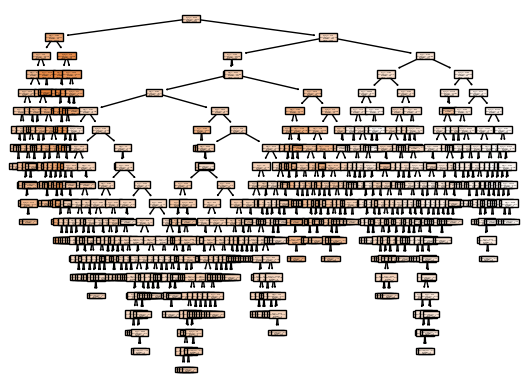

In [37]:
plot_tree(DT, filled=True);

Let's limit its depth:

In [46]:
DT = DecisionTreeRegressor(max_depth=5)
DT.fit(X_train, y_train)
print("Train R-score:", DT.score(X_train, y_train))
print("Test R-score:", DT.score(X_test, y_test))

Train R-score: 0.9236293582408719
Test R-score: 0.5332443216519807


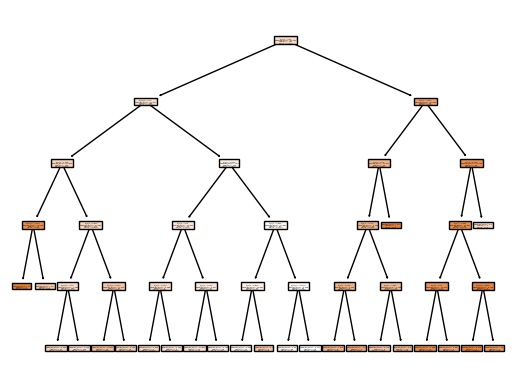

In [47]:
plot_tree(DT, filled=True);

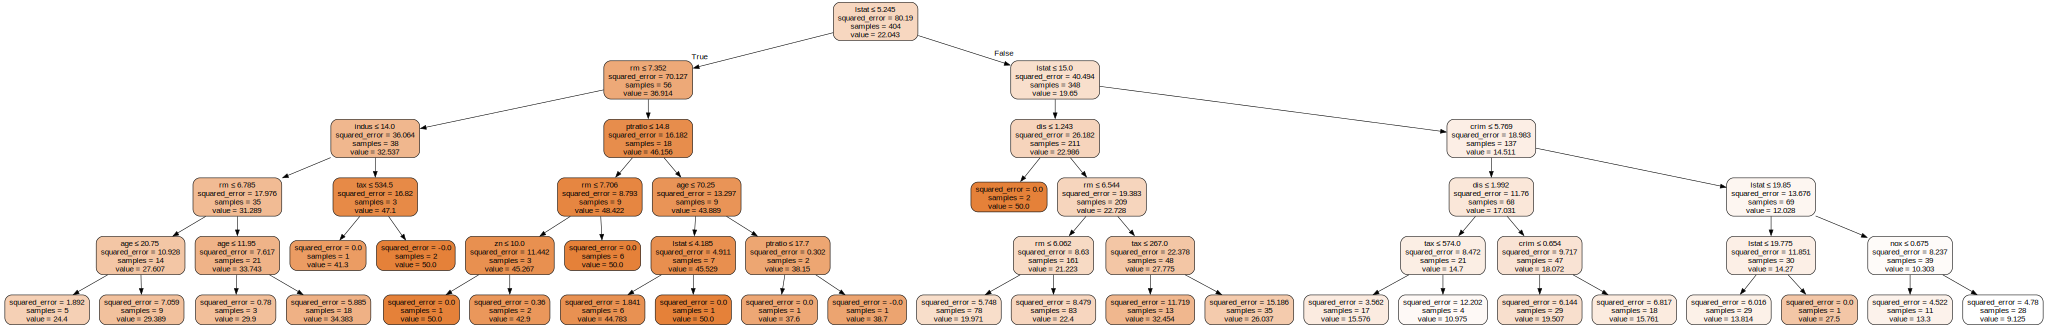

In [41]:
import graphviz

dot_data = export_graphviz(DT, out_file=None, 
                           feature_names=boston.columns[:-1],   
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 